In [58]:
import pandas as pd
import numpy as np

data = pd.read_csv("temizlenmis_veri.csv") 

# Adım 2: Eksik verileri temizle ("?" olanları NaN yap ve satırları at)
data = data.replace("?", np.nan).dropna()

# Adım 3: Sayısal olmayan değişkenleri sayısal hale getir (one-hot encoding)
data = pd.get_dummies(data)



In [60]:
from sklearn.model_selection import train_test_split

# Adım 4: Bağımlı ve bağımsız değişkenleri ayır
# Burada hedef değişken 'survival_status'
y = data['survival_status']
data = data.drop(columns=["survival_time"])
X = data.drop(['survival_status'], axis=1, errors='ignore')

# Adım 5: Veriyi eğitim ve test setlerine ayır (70% eğitim, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
from sklearn.linear_model import LogisticRegression

# Adım 6: Lojistik regresyon modelini kur ve eğit
lr_model = LogisticRegression(max_iter=1000)  # max_iter artırılarak eğitim tamamlanması sağlanır
lr_model.fit(X_train, y_train)
# Adım 7: Test verisi ile tahmin yap
y_pred = lr_model.predict(X_test)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk Oranı (Accuracy): %", round(accuracy * 100, 2))

Doğruluk Oranı (Accuracy): % 69.77


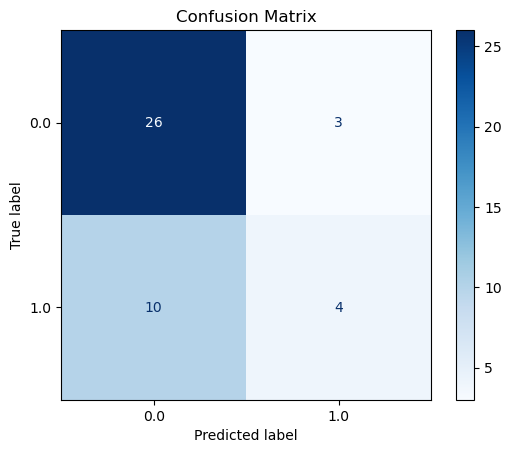

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [50]:
import pickle

# Modeli kaydet
with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(log_model, f)